In [1]:
import lightkurve as lk
from MainWindow import main

In [2]:
kic = '10291535'

In [3]:
lcs = lk.search_lightcurvefile(kic).download_all()

In [4]:
lc = lcs.PDCSAP_FLUX.stitch().normalize().flatten(window_length=401).remove_outliers(4)

/Users/davies/Library/Python/3.7/lib/python/site-packages/lightkurve/lightcurve.py:674: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning)


In [5]:
pg_full = lc.to_periodogram(normalization='psd').flatten()

In [6]:
seismo = pg_full.to_seismology()

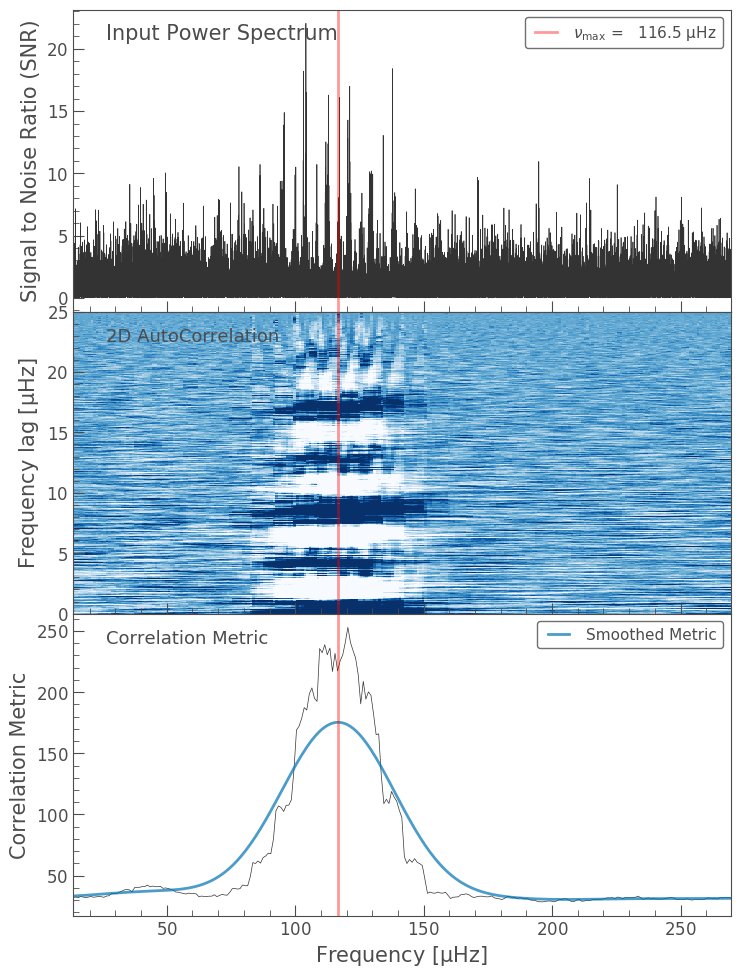

In [7]:
seismo.estimate_numax()
seismo.diagnose_numax();

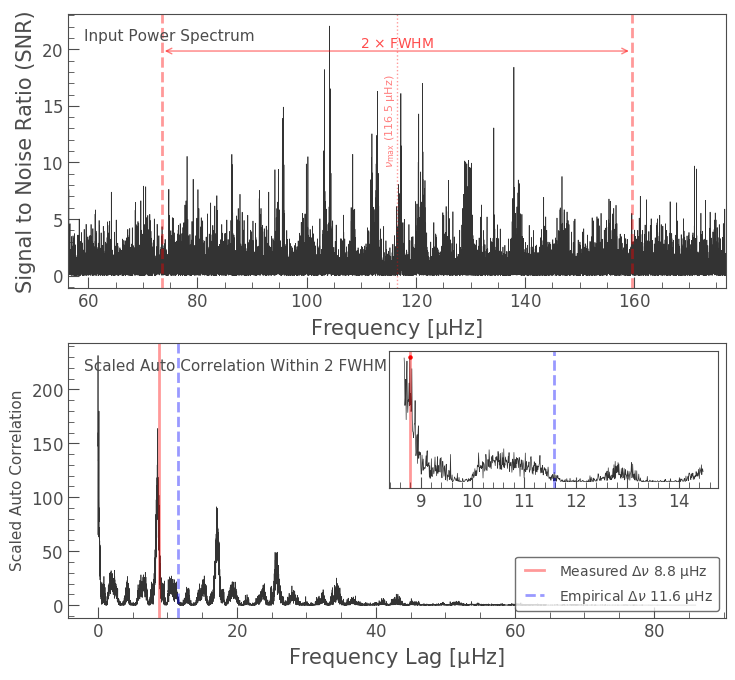

In [8]:
seismo.estimate_deltanu()
seismo.diagnose_deltanu();

In [9]:
numax = seismo.numax.value
dnu = seismo.deltanu.value

In [10]:
pg = lc.to_periodogram(normalization='psd',
                       minimum_frequency=numax - dnu * 4,
                       maximum_frequency=numax + dnu * 4).flatten()

Setting up app
Setting up MyMainWindow
Exiting


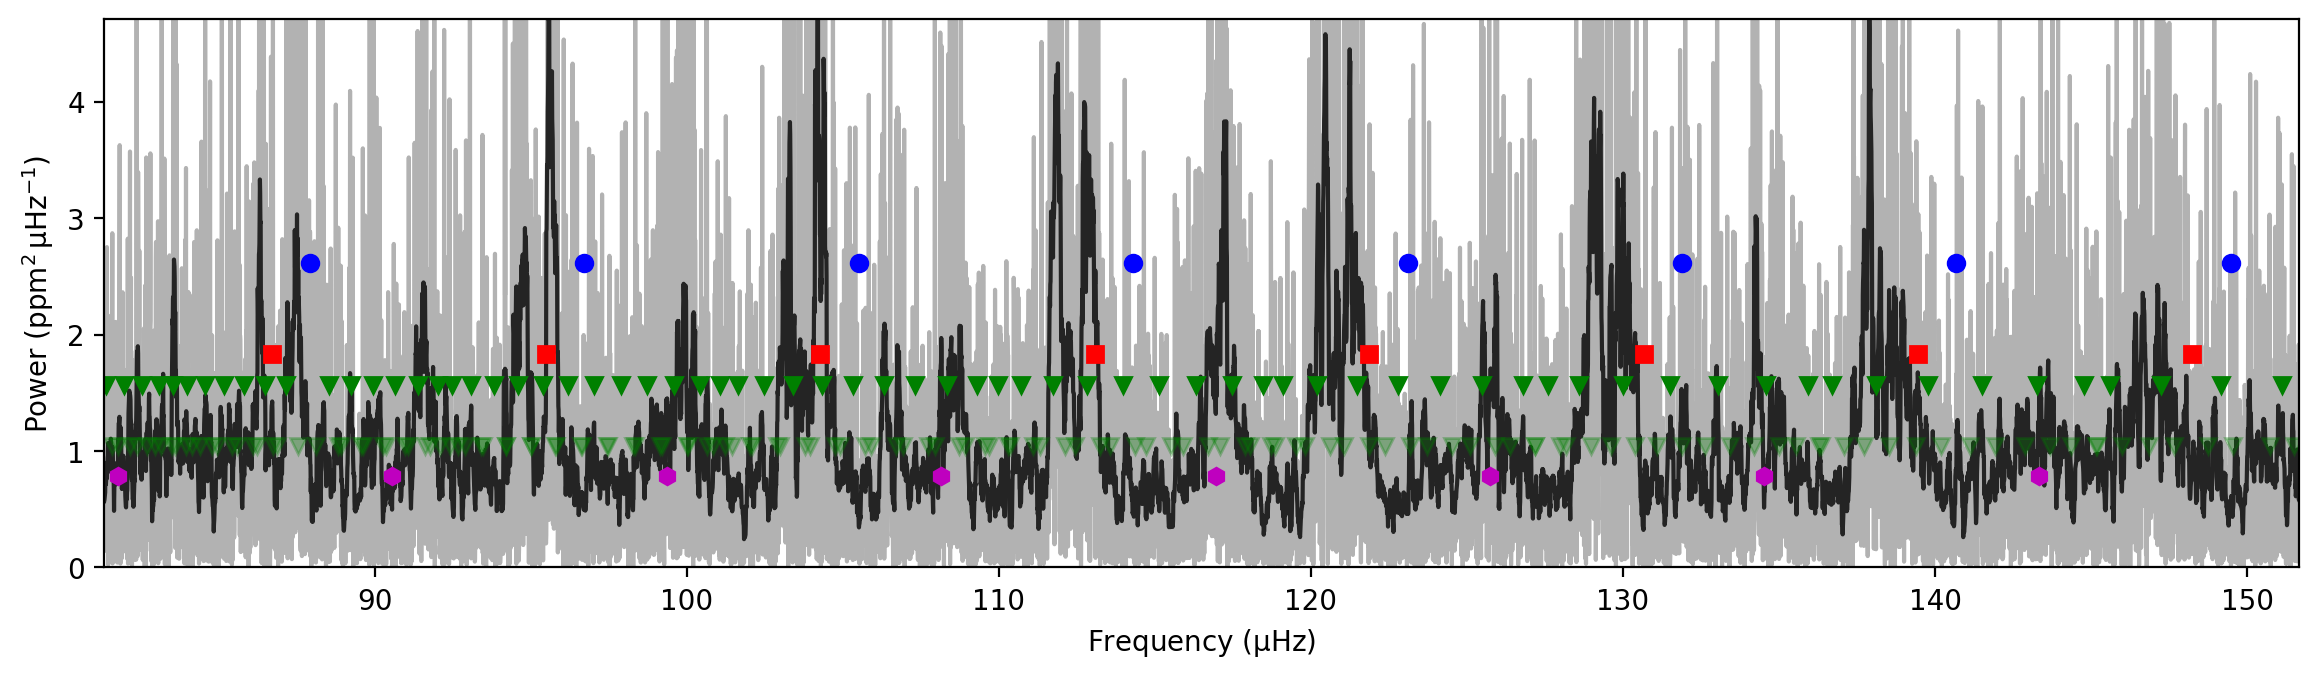

In [11]:
main(pg, dnu, numax, verbose=True)